<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Computer Vision - Convolutional Neural Network (CNN) - MNIST
</b></font> </br></p> 

---

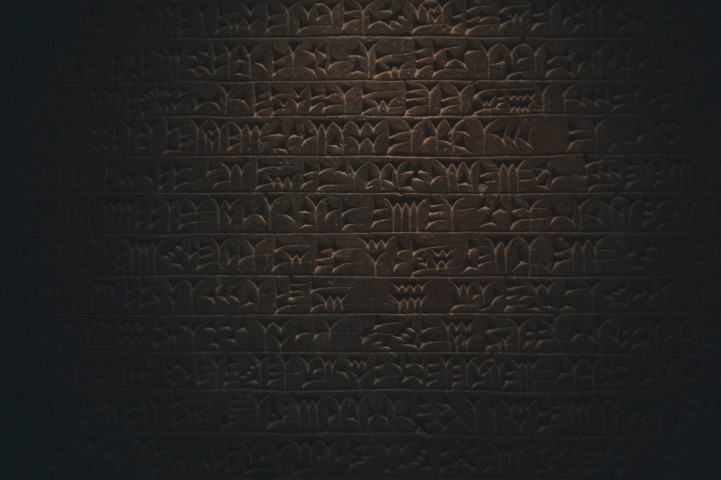

Foto von <a href="https://unsplash.com/@vonshnauzer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Egor Myznik</a> auf <a href="https://unsplash.com/de/fotos/of_azYsANQY?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


Die MNIST-Datenbank ( Modified National Institute of Standards and Technology database ) ist eine große Datenbank mit handgeschriebenen Ziffern, die üblicherweise zum Trainieren verschiedener Bildverarbeitungssysteme verwendet wird. 

Die MNIST-Datenbank mit handgeschriebenen Ziffern hat einen Trainingssatz von 60.000 Beispielen und einen Testsatz von 10.000 Beispielen mit jeweils  28x28 Pixel.







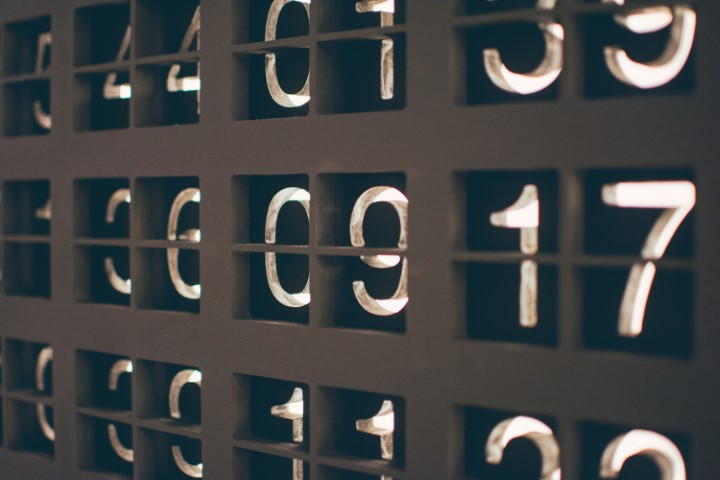

Foto von <a href="https://unsplash.com/@nhillier?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nick Hillier</a> auf <a href="https://unsplash.com/de/fotos/yD5rv8_WzxA?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [ ]:
(data_train, target_train), (data_test, target_test) = keras.datasets.mnist.load_data()

In [ ]:
data_train.shape, target_train.shape, data_test.shape, target_test.shape


<p><font color='black' size="5">
Anzeigen eines Bildes als Matrix der Pixelwerte
</font></p>

In [ ]:
test_index = 333
image = pd.DataFrame(data_train[test_index])

In [ ]:
image.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_train[test_index].reshape((28,28)))

<p><font color='black' size="5">
Anzeigen der ersten 25 Bilder
</font></p>

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i].reshape((28,28)))
    plt.title('Digit:{}'.format(target_train[i]))
    label_index = int(target_train[i])
plt.show()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Numpy
</font></p>

In [ ]:
np.info(data_train)

In [ ]:
np.min(data_train), np.max(data_train)

In [ ]:
np.info(target_train)

In [ ]:
np.min(target_train), np.max(target_train)

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Skalieren der Daten (0,1)
</font></p>

In [ ]:
data_train = data_train.astype("float32") / 255
data_test = data_test.astype("float32") / 255

<p><font color='black' size="5">
Erstellen Matrix binärer Werte der Targetwerte - braucht Keras
</font></p>

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
target_train = keras.utils.to_categorical(target_train, num_classes)
target_test = keras.utils.to_categorical(target_test, num_classes)

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Modellierung eines Neuronalen Netzes
</font></p>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

<p><font color='black' size="5">
Einfaches Layer-Diagramm
</font></p>

In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<p><font color='black' size="5">
Training
</font></p>


In [ ]:
%%time
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(data_train, target_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
print(history.params)
print(history.history.keys())

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
score = model.evaluate(data_test, target_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1] * 100)

# **5 <font color='orange'>|</font> Deploy**
---